In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
#Load dataset
df = pd.read_csv("Salary_Data.csv")

In [4]:
#View Data
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
#Describe data

df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


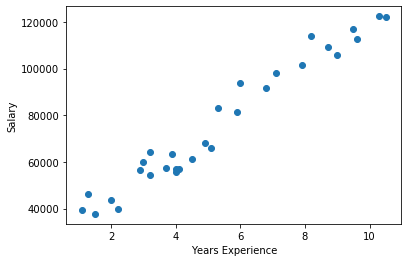

In [6]:
#Create a scatter plot
#ChecK Relationship

plt.scatter(df["YearsExperience"], df["Salary"])
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

In [7]:
#Split your dataset 80/20
#Create a mask to select random rows using numpy
mask = np.random.rand(len(df)) < 0.8

train = df[mask]
test = df[~mask]


#### Build the model



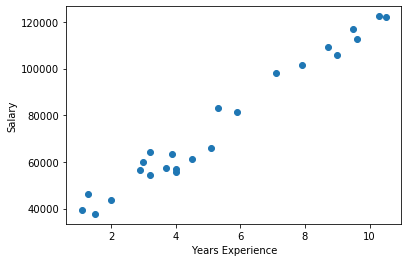

In [8]:
#Train scatter
plt.scatter(train["YearsExperience"], train["Salary"])
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

### Modelling using Scikitlearn

In [9]:
from sklearn import linear_model

model = linear_model.LinearRegression()

train_x = np.asanyarray(train[['YearsExperience']])
train_y = np.asanyarray(train[["Salary"]])

model.fit(train_x, train_y)

print("Slope: " ,model.coef_)
print("Intecept: ", model.intercept_)

Slope:  [[9107.00142045]]
Intecept:  [27386.64247159]


### Plot Model

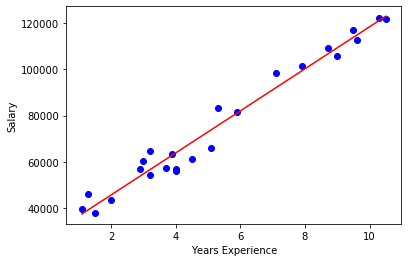

In [10]:
plt.scatter(train.YearsExperience,train.Salary, color="blue")
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-r')
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

### Evaluation

In [12]:
#Mean Absolute Error
#Mean Squared Error
#R-squared

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["YearsExperience"]])
test_y = np.asanyarray(test[["Salary"]])
test_y_ = model.predict(test_x)

print("Mean Absolute Error: ",  np.mean(np.absolute(test_y_ - test_y)))
print("Residual Sum of Errror (MSE): ", np.mean((test_y_ - test_y) ** 2))
print("R-Squared", r2_score(test_y_,test_y))

Mean Absolute Error:  7555.23101325757
Residual Sum of Errror (MSE):  69585107.83315136
R-Squared 0.7745951801540117


#### The higher the R-squared, the better the model fits your data. Best possible score is 1.0
#### Mean absolute error is the mean of the absolute value of the errors